In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [14]:
data = pd.read_csv("sales_data_sample.csv", encoding=('ISO-8859-1'), index_col=0)
data.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [15]:
data.shape

(2823, 24)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 10107 to 10414
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   QUANTITYORDERED   2823 non-null   int64  
 1   PRICEEACH         2823 non-null   float64
 2   ORDERLINENUMBER   2823 non-null   int64  
 3   SALES             2823 non-null   float64
 4   ORDERDATE         2823 non-null   object 
 5   STATUS            2823 non-null   object 
 6   QTR_ID            2823 non-null   int64  
 7   MONTH_ID          2823 non-null   int64  
 8   YEAR_ID           2823 non-null   int64  
 9   PRODUCTLINE       2823 non-null   object 
 10  MSRP              2823 non-null   int64  
 11  PRODUCTCODE       2823 non-null   object 
 12  CUSTOMERNAME      2823 non-null   object 
 13  PHONE             2823 non-null   object 
 14  ADDRESSLINE1      2823 non-null   object 
 15  ADDRESSLINE2      302 non-null    object 
 16  CITY              2823 non-null   obj

In [17]:
data.isnull().sum()

QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

# Data Preprocessing 

In [18]:
data.drop(['ORDERLINENUMBER', 'STATUS', 'PRODUCTCODE', 'PHONE', 'STATE', 'POSTALCODE', 'TERRITORY', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME'], axis=1, inplace=True)
data.head()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,ADDRESSLINE1,ADDRESSLINE2,CITY,COUNTRY,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,
10107,30,95.70,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,95,Land of Toys Inc.,897 Long Airport Avenue,NaN,NYC,USA,Small
10121,34,81.35,2765.90,5/7/2003 0:00,2,5,2003,Motorcycles,95,Reims Collectables,59 rue de l'Abbaye,NaN,Reims,France,Small
10134,41,94.74,3884.34,7/1/2003 0:00,3,7,2003,Motorcycles,95,Lyon Souveniers,27 rue du Colonel Pierre Avia,NaN,Paris,France,Medium
10145,45,83.26,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,95,Toys4GrownUps.com,78934 Hillside Dr.,NaN,Pasadena,USA,Medium
10159,49,100.00,5205.27,10/10/2003 0:00,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,7734 Strong St.,NaN,San Francisco,USA,Medium


In [19]:
data["ADDRESS"] = data["ADDRESSLINE1"].fillna(' ') + "  " + data["ADDRESSLINE2"].fillna('')   
data.drop(['ADDRESSLINE1','ADDRESSLINE2'], axis=1, inplace=True)
data.head()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,CUSTOMERNAME,CITY,COUNTRY,DEALSIZE,ADDRESS
ORDERNUMBER,,,,,,,,,,,,,,
10107,30,95.70,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,95,Land of Toys Inc.,NYC,USA,Small,897 Long Airport Avenue
10121,34,81.35,2765.90,5/7/2003 0:00,2,5,2003,Motorcycles,95,Reims Collectables,Reims,France,Small,59 rue de l'Abbaye
10134,41,94.74,3884.34,7/1/2003 0:00,3,7,2003,Motorcycles,95,Lyon Souveniers,Paris,France,Medium,27 rue du Colonel Pierre Avia
10145,45,83.26,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,95,Toys4GrownUps.com,Pasadena,USA,Medium,78934 Hillside Dr.
10159,49,100.00,5205.27,10/10/2003 0:00,4,10,2003,Motorcycles,95,Corporate Gift Ideas Co.,San Francisco,USA,Medium,7734 Strong St.


In [20]:
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE']).astype(np.int64)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 10107 to 10414
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   SALES            2823 non-null   float64
 3   ORDERDATE        2823 non-null   int64  
 4   QTR_ID           2823 non-null   int64  
 5   MONTH_ID         2823 non-null   int64  
 6   YEAR_ID          2823 non-null   int64  
 7   PRODUCTLINE      2823 non-null   object 
 8   MSRP             2823 non-null   int64  
 9   CUSTOMERNAME     2823 non-null   object 
 10  CITY             2823 non-null   object 
 11  COUNTRY          2823 non-null   object 
 12  DEALSIZE         2823 non-null   object 
 13  ADDRESS          2823 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 330.8+ KB


In [22]:
data.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
SALES              0
ORDERDATE          0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
CUSTOMERNAME       0
CITY               0
COUNTRY            0
DEALSIZE           0
ADDRESS            0
dtype: int64

In [23]:
data.describe()

,QUANTITYORDERED,PRICEEACH,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2.823000e+03,2823.000000,2823.000000,2823.00000,2823.000000
mean,35.092809,83.658544,3553.889072,1.084235e+18,2.717676,7.092455,2003.81509,100.715551
std,9.741443,20.174277,1841.865106,1.992714e+16,1.203878,3.656633,0.69967,40.187912
min,6.000000,26.880000,482.130000,1.041811e+18,1.000000,1.000000,2003.00000,33.000000
25%,27.000000,68.860000,2203.430000,1.068120e+18,2.000000,4.000000,2003.00000,68.000000
50%,35.000000,95.700000,3184.800000,1.087258e+18,3.000000,8.000000,2004.00000,99.000000
75%,43.000000,100.000000,4508.000000,1.100693e+18,4.000000,11.000000,2004.00000,124.000000
max,97.000000,100.000000,14082.800000,1.117498e+18,4.000000,12.000000,2005.00000,214.000000


# Analysis 

In [24]:
# Which country has the best sales?
country = data.groupby(['COUNTRY'])['SALES'].sum().reset_index()

short_form = ['AUS','AUT','BEL','CAN','DNK','FIN','FRA','DEU','IRL','ITA','JPN','NOR','PHL','SGP','ESP','SWE','CHE','GBR','USA']
country['iso_alpha'] = short_form
country

,COUNTRY,SALES,iso_alpha
0,Australia,630623.10,AUS
1,Austria,202062.53,AUT
2,Belgium,108412.62,BEL
3,Canada,224078.56,CAN
4,Denmark,245637.15,DNK
5,Finland,329581.91,FIN
6,France,1110916.52,FRA
7,Germany,220472.09,DEU
8,Ireland,57756.43,IRL
9,Italy,374674.31,ITA


In [45]:
# Which city has the best sales?
cities = data.groupby(['CITY'])['SALES'].sum().reset_index()
cities

,CITY,SALES
0,Aaarhus,100595.55
1,Allentown,122138.14
2,Barcelona,78411.86
3,Bergamo,137955.72
4,Bergen,111640.28
...,...,...
68,Toulouse,70488.44
69,Tsawassen,74634.85
70,Vancouver,75238.92
71,Versailles,64834.32


In [46]:
# What product sold the most? Why do you think it sold the most?
products = data.groupby(['PRODUCTLINE'])['SALES'].sum().reset_index() 
price = data.groupby(['PRODUCTLINE'])['MSRP'].min().reset_index()   # MSRP = Manufacturer’s Suggested Retail Price
result=pd.merge(products,price)
result

,PRODUCTLINE,SALES,MSRP
0,Classic Cars,3919615.66,35
1,Motorcycles,1166388.34,40
2,Planes,975003.57,49
3,Ships,714437.13,54
4,Trains,226243.47,58
5,Trucks and Buses,1127789.84,54
6,Vintage Cars,1903150.84,33


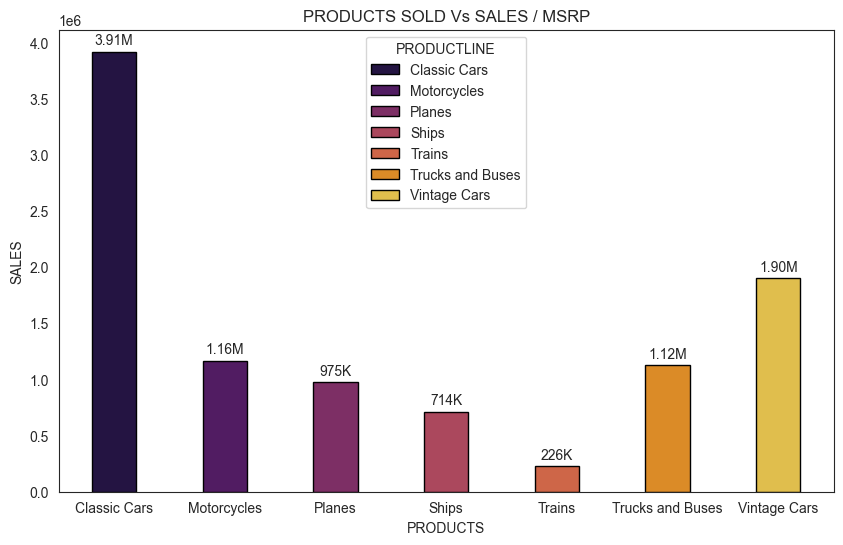

In [48]:
plt.figure(figsize=(10,6))

ax = sns.barplot(x='PRODUCTLINE',y='SALES',data=result,hue='PRODUCTLINE',palette='inferno',  # barplot
                 edgecolor='black',dodge=False, width= 0.4)

tb = ['3.91M','1.16M','975K','714K','226K','1.12M','1.90M']
ax.bar_label(ax.containers[0], labels=tb, padding=3) # labelling the first bar with a distance of 3 from the bar
ax.bar_label(ax.containers[1], labels=tb, padding=3)
ax.bar_label(ax.containers[2], labels=tb, padding=3)
ax.bar_label(ax.containers[3], labels=tb, padding=3)
ax.bar_label(ax.containers[4], labels=tb, padding=3)
ax.bar_label(ax.containers[5], labels=tb, padding=3)
ax.bar_label(ax.containers[6], labels=tb, padding=3)

sns.set_style('white')  # background
plt.title("PRODUCTS SOLD Vs SALES / MSRP") # add title
ax.set(xlabel='PRODUCTS')
plt.show()

In [49]:
# Who was the top customer?
top_customer = data.groupby(['CUSTOMERNAME']).sum().sort_values('SALES', ascending = False).head(5)
top_customer = top_customer[['SALES']].round(3) 
top_customer.reset_index(inplace = True) 
top_customer.head()

,CUSTOMERNAME,SALES
0,Euro Shopping Channel,912294.11
1,Mini Gifts Distributors Ltd.,654858.06
2,"Australian Collectors, Co.",200995.41
3,Muscle Machine Inc,197736.94
4,La Rochelle Gifts,180124.90


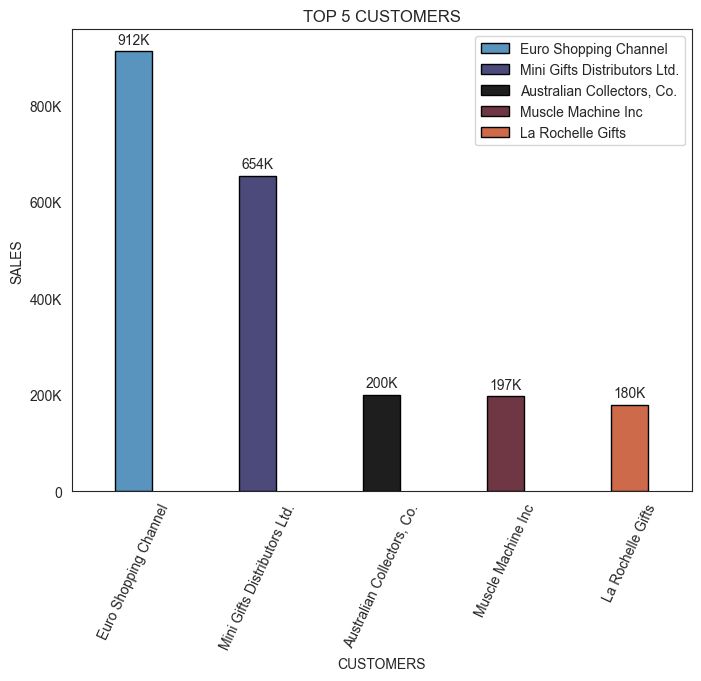

In [50]:
# Set the width and height of the figure
plt.figure(figsize=(8,6))

# main plotting of the bar chart
z= sns.barplot(x='CUSTOMERNAME',y='SALES',data=top_customer,hue='CUSTOMERNAME',palette='icefire',
               edgecolor='black', dodge=False, width= 0.3)
sns.set_style('whitegrid') 

plt.title("TOP 5 CUSTOMERS") # add title 
z.set(xlabel='CUSTOMERS', ylabel='SALES')

# to add labels to each bar in the bar chart 
tb = ['912K','654K','200K','197K','180K']
z.bar_label(z.containers[0], labels=tb, padding=3) # labelling the first bar with a distance of 3 from the bar
z.bar_label(z.containers[1], labels=tb, padding=3)
z.bar_label(z.containers[2], labels=tb, padding=3)
z.bar_label(z.containers[3], labels=tb, padding=3)
z.bar_label(z.containers[4], labels=tb, padding=3)

# setting the ticks on both axis
plt.xticks(rotation=65)
z.set_yticklabels(["0","200K","400K","600K","800K"])

# adjust the legend size    
plt.legend(prop={'size': 9})
plt.legend(loc='upper right')
plt.show()

In [51]:
# What is monthly sales of each financial year?
monthly_sales = data.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()
monthly_sales.head(16)

,YEAR_ID,MONTH_ID,SALES
0,2003,1,129753.60
1,2003,2,140836.19
2,2003,3,174504.90
3,2003,4,201609.55
4,2003,5,192673.11
5,2003,6,168082.56
6,2003,7,187731.88
7,2003,8,197809.30
8,2003,9,263973.36
9,2003,10,568290.97


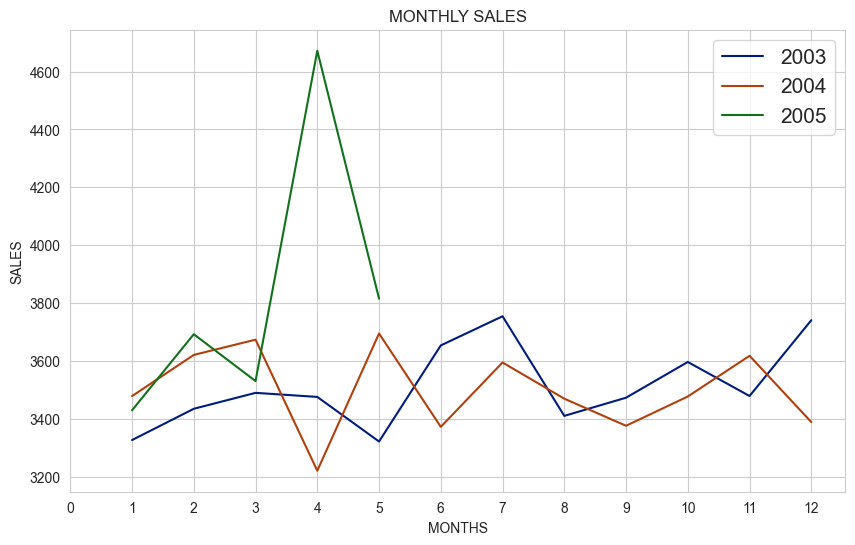

In [52]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

plt.title("MONTHLY SALES") # add title 

a= sns.lineplot(x='MONTH_ID',y='SALES',data=data,hue='YEAR_ID',palette='dark',errorbar=None,)
sns.set_style('whitegrid') # add white grid behind

plt.xlabel('MONTHS')
plt.ylabel('SALES')
plt.legend(prop={'size': 15})  # adjust the legend size

a.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])    # to specifically adjust x-axis
plt.show()

In [53]:
# What is the best year according to sales?
yearly_sales=data.groupby(['YEAR_ID'])['SALES'].sum().reset_index()
yearly_sales

,YEAR_ID,SALES
0,2003,3516979.54
1,2004,4724162.60
2,2005,1791486.71


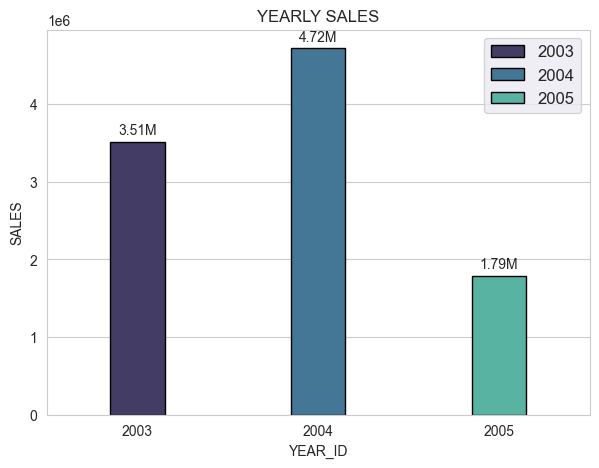

In [54]:
plt.figure(figsize=(7,5))

plt.title("YEARLY SALES") # add title 
plt.xlabel('YEARS')
plt.ylabel('SALES (IN MILLIONS)')

# main plotting of the bar chart
z= sns.barplot(x='YEAR_ID',y='SALES',data=yearly_sales,hue='YEAR_ID',palette='mako',edgecolor='black', dodge=False, width= 0.3)
sns.set_style('darkgrid') 

# to add labels to each bar in the bar chart 
tb = ['3.51M','4.72M','1.79M']
z.bar_label(z.containers[0], labels=tb, padding=3) # labelling the first bar with a distance of 3 from the bar
z.bar_label(z.containers[1], labels=tb, padding=3)
z.bar_label(z.containers[2], labels=tb, padding=3)


# adjust the legend size    
plt.legend(prop={'size': 12})
plt.show()

In [56]:
# Which quarter is the best for each product line?
quarter = data.groupby(['PRODUCTLINE']).QTR_ID.value_counts().reset_index(name='COUNTS')
quarter.head()

,PRODUCTLINE,QTR_ID,COUNTS
0,Classic Cars,4,392
1,Classic Cars,1,217
2,Classic Cars,3,183
3,Classic Cars,2,175
4,Motorcycles,4,117


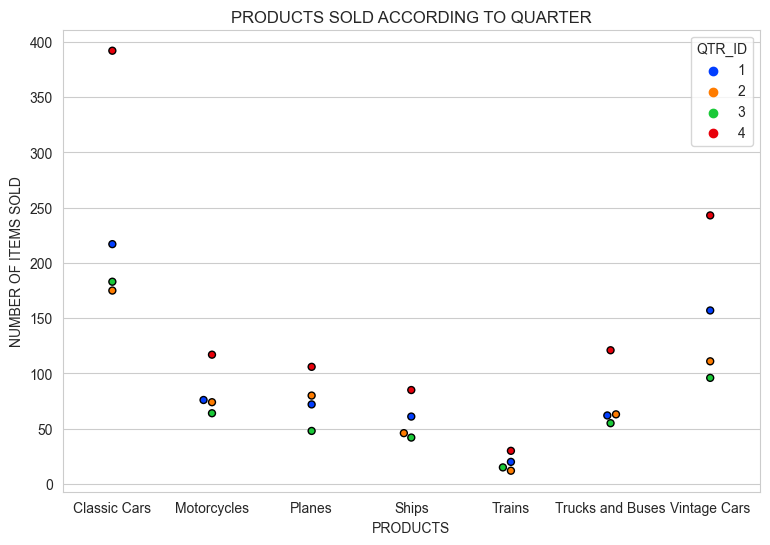

In [72]:
# Set the width and height of the figure
plt.figure(figsize=(9,6))

kwargs = {'edgecolor':"black", 'linewidth':1} #applying colors to the edge dots

sns.swarmplot(x='PRODUCTLINE',y='COUNTS',data=quarter,hue='QTR_ID',palette='bright',**kwargs)
sns.set_style('whitegrid') # Setting the background 

plt.title("PRODUCTS SOLD ACCORDING TO QUARTER") # add title
plt.xlabel('PRODUCTS')
plt.ylabel('NUMBER OF ITEMS SOLD')
plt.show()

In [12]:
# Import necessary libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [13]:
# Sample data (replace with your actual data)
data = pd.read_csv('sales_data_sample.csv', encoding=('ISO-8859-1'), index_col=0)

In [14]:
data['Date'] = pd.to_datetime(data['ORDERDATE'])
data = data.rename(columns={'Date': 'ds', 'SALES': 'y'})

15:22:51 - cmdstanpy - INFO - Chain [1] start processing
15:22:51 - cmdstanpy - INFO - Chain [1] done processing


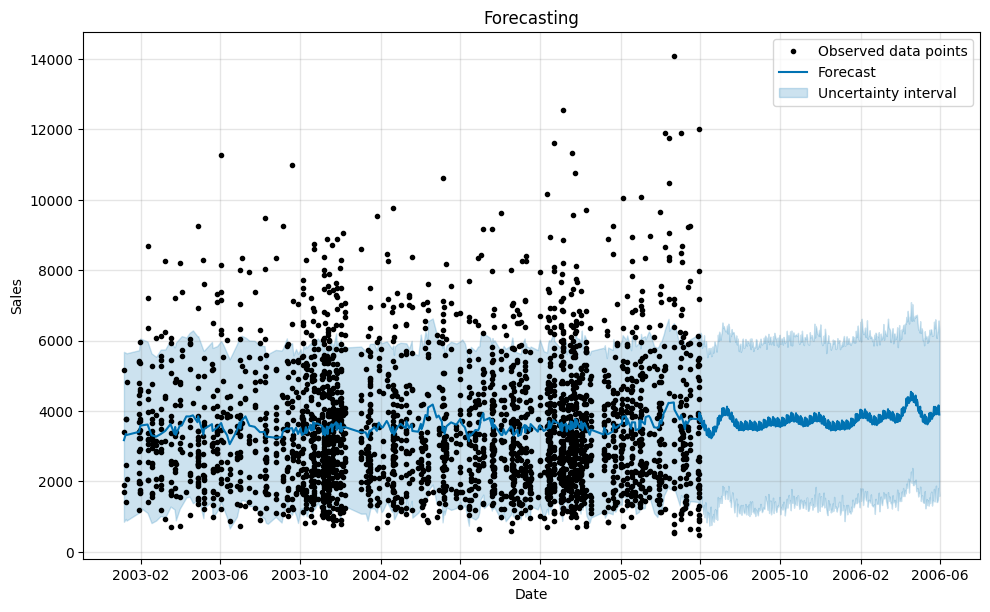

In [16]:
# Import necessary libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
data = pd.read_csv('sales_data_sample.csv', encoding=('ISO-8859-1'), index_col=0)

data['Date'] = pd.to_datetime(data['ORDERDATE'])
data = data.rename(columns={'Date': 'ds', 'SALES': 'y'})

model = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True, weekly_seasonality=True, holidays_prior_scale=10)
model.fit(data)

# Create a future dataframe for forecasting
future = model.make_future_dataframe(periods=365)  # Forecast for one year

# Forecast demand
forecast = model.predict(future)

# Visualize the forecast
fig = model.plot(forecast)
plt.title('Forecasting')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2003-01-06,3409.685288,851.142067,5677.454500,3409.685288,3409.685288,-0.070500,-0.070500,-0.070500,-0.021608,-0.021608,-0.021608,-0.048892,-0.048892,-0.048892,0.0,0.0,0.0,3169.302534
1,2003-01-09,3410.329132,933.456300,5649.057426,3410.329132,3410.329132,-0.018560,-0.018560,-0.018560,0.030455,0.030455,0.030455,-0.049014,-0.049014,-0.049014,0.0,0.0,0.0,3347.034228
2,2003-01-10,3410.543747,885.078821,5636.617349,3410.543747,3410.543747,-0.027574,-0.027574,-0.027574,0.021165,0.021165,0.021165,-0.048740,-0.048740,-0.048740,0.0,0.0,0.0,3316.500105
3,2003-01-29,3414.621428,1109.510256,5724.010892,3414.621428,3414.621428,-0.002746,-0.002746,-0.002746,-0.023263,-0.023263,-0.023263,0.020517,0.020517,0.020517,0.0,0.0,0.0,3405.245256
4,2003-01-31,3415.050658,1255.908890,6055.675005,3415.050658,3415.050658,0.049019,0.049019,0.049019,0.021165,0.021165,0.021165,0.027854,0.027854,0.027854,0.0,0.0,0.0,3582.453633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,2006-05-27,3828.921258,1413.222881,6073.461038,3817.505458,3841.475532,0.019878,0.019878,0.019878,-0.029261,-0.029261,-0.029261,0.049139,0.049139,0.049139,0.0,0.0,0.0,3905.031599
613,2006-05-28,3829.393175,1418.277381,6214.111107,3817.936450,3841.975118,0.031450,0.031450,0.031450,-0.017830,-0.017830,-0.017830,0.049279,0.049279,0.049279,0.0,0.0,0.0,3949.827323
614,2006-05-29,3829.865093,1483.416640,6273.404634,3818.367443,3842.503712,0.026314,0.026314,0.026314,-0.021608,-0.021608,-0.021608,0.047922,0.047922,0.047922,0.0,0.0,0.0,3930.643445
615,2006-05-30,3830.337011,1817.140466,6570.735911,3818.798435,3843.045621,0.085393,0.085393,0.085393,0.040342,0.040342,0.040342,0.045052,0.045052,0.045052,0.0,0.0,0.0,4157.421935


In [ ]:
forecast